In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")

Mounted at /content/drive


In [ ]:
y = data['Humedad']
#y = data['CSS BRIX°']
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]

In [ ]:
print(X[0:1])
from sklearn.preprocessing import StandardScaler

# Suponiendo que ya has ajustado el StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Obtener los parámetros
mean_X = scaler.mean_
std_X = scaler.scale_

# Para y
y_2d = y.values.reshape(-1, 1)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_2d)

mean_y = scaler_y.mean_
std_y = scaler_y.scale_


print("Media:",mean_X)
print("Desviacion Estandar:", std_X)

print("Media:",mean_y)
print("Desviacion Estandar:", std_y)
print(X_scaled[0:1])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test[0:1])



     NIR_R    NIR_S    NIR_T    NIR_U    NIR_V   NIR_W  Vis_Violet  Vis_Blue  \
0  845.629  230.559  211.574  127.719  106.249  55.804     314.151   412.851   

   Vis_Green  Vis_Yellow  Vis_Orange  Vis_Red  
0    661.456     801.144     403.137  235.022  
Media: [2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.89596  458.25495 1335.20657 1719.79216 1974.7694  1428.86665]
Desviacion Estandar: [1336.83140523  324.26844997   79.50581074   44.53816924   83.44942931
   46.96958707  196.87900009  223.75305904 1015.48326058 1003.87712041
  995.10313129  522.24981666]
Media: [52.72427709]
Desviacion Estandar: [5.13504083]
[[-1.53034341 -1.77547597 -0.19841179 -0.00933379 -1.03244924 -1.15845281
  -1.06027032 -0.20291991 -0.66347777 -0.91510021 -1.57936635 -2.28596471]]


In [ ]:
# prompt: desescalar los valores de X_test

X_test_descaled = scaler.inverse_transform(X_test)
print(X_test_descaled[0:1])


[[2240.319  754.018  199.185  109.068  146.565   87.921  423.837  353.905
   484.946  860.277 1095.734 1209.172]]


In [ ]:
# Definir la arquitectura del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Guardar el modelo
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - loss: 1.4702 - val_loss: 1.1276
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 1.2177 - val_loss: 1.0935
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 1.1640 - val_loss: 1.0675
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 1.0851 - val_loss: 1.0445
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.9131 - val_loss: 1.0241
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.8492 - val_loss: 1.0037
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.8079 - val_loss: 0.9871
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.6925 - val_loss: 0.9709
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8287 - val_loss: 0.9556
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.7466 - val_loss: 0.9398
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.6224 - val_loss: 0.9232
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.5644 - val_loss: 0.90

In [ ]:
print(X_test[0:1])
# Predecir los niveles de carbohidratos en el conjunto de prueba
y_pred = model.predict(X_test[:])
print(y_pred)

# Calcular métricas de regresión adicionales
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de correlación (R^2):", r2)

[[-0.48706301 -0.16119928 -0.35423688 -0.4280982  -0.5493303  -0.47466992
  -0.5031464  -0.46636212 -0.83729649 -0.85619559 -0.8833611  -0.42066965]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[-0.40463156]
 [-0.30318573]
 [-0.30744743]
 [-0.3528173 ]
 [-0.45964676]
 [-1.2385966 ]
 [ 0.61931837]
 [-0.430344  ]
 [ 0.7588104 ]
 [ 0.58915216]
 [ 0.14037935]
 [ 0.27126926]
 [-0.57810247]
 [-0.14896731]
 [-0.40670395]
 [ 1.5390342 ]
 [-0.53029305]
 [-0.30494744]
 [ 0.27734572]
 [ 0.5142509 ]]
Error cuadrático medio (MSE): 0.5715973407625009
Error absoluto medio (MAE): 0.577445572279475
Raíz del error cuadrático medio (RMSE): 0.7560405681988903
Coeficiente de correlación (R^2): 0.3504786232301573


In [ ]:
# prompt: dessecarlar y_pred

y_pred_descaled = scaler_y.inverse_transform(y_pred)
print(y_pred_descaled)


[[50.646477]
 [51.167404]
 [51.145523]
 [50.912544]
 [50.36397 ]
 [46.364033]
 [55.904503]
 [50.514442]
 [56.6208  ]
 [55.749596]
 [53.44513 ]
 [54.117256]
 [49.7557  ]
 [51.959324]
 [50.635838]
 [60.62728 ]
 [50.0012  ]
 [51.15836 ]
 [54.14846 ]
 [55.364975]]


In [ ]:
import tensorflow as tf

# Cargar el modelo guardado
model = tf.keras.models.load_model('my_model.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpqxk96ico'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425425243152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425423858976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424001856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424004144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424006784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424009072: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# prompt: quiero saber si mi modelo anterior esta en punto flotante FLOAT32, como hago

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
]
tflite_model = converter.convert()

# Check the data type of the quantized model.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
print("Input data type:", input_details["dtype"])

output_details = interpreter.get_output_details()[0]
print("Output data type:", output_details["dtype"])


Saved artifact at '/tmp/tmpsa1l_e8m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425425243152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425423858976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424001856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424004144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424006784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425424009072: TensorSpec(shape=(), dtype=tf.resource, name=None)
Input data type: <class 'numpy.float32'>
Output data type: <class 'numpy.float32'>


In [ ]:
! xxd -i model.tflite > model.cc
! cat model.cc


unsigned char model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x94, 0x00, 0x00, 0x00, 0xec, 0x00, 0x00, 0x00, 0x10, 0x11, 0x00, 0x00,
  0x20, 0x11, 0x00, 0x00, 0xf8, 0x15, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x94, 0xff, 0xff, 0xff, 0x09, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x6f, 0x75, 0x74, 0x70,
  0x75, 0x74, 0x5f, 0x30, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x0

In [ ]:
# prompt: Realizar lo mismo anteriormente pero con variables de grados °BRIX

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")
y = data['°BRIX']
#y = data['CSS BRIX°']
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
print(X[0:1])

# Suponiendo que ya has ajustado el StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Obtener los parámetros
mean_X = scaler.mean_
std_X = scaler.scale_

# Para y
y_2d = y.values.reshape(-1, 1)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_2d)

mean_y = scaler_y.mean_
std_y = scaler_y.scale_


print("Media:",mean_X)
print("Desviacion Estandar:", std_X)

print("Media:",mean_y)
print("Desviacion Estandar:", std_y)
print(X_scaled[0:1])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler.mean_  # Mean of each feature
scaler.scale_  # Standard deviation of each feature
print(scaler.mean_)
print(scaler.scale_)

# Definir la arquitectura del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Guardar el modelo
model.save('my_model_brix.h5')
print(X_test[0:1])
# Predecir los niveles de carbohidratos en el conjunto de prueba
y_pred = model.predict(X_test[:])
print(y_pred)

# Calcular métricas de regresión adicionales
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de correlación (R^2):", r2)

y_pred_descaled = scaler_y.inverse_transform(y_pred)
print(y_pred_descaled)


# Cargar el modelo guardado
model = tf.keras.models.load_model('my_model_brix.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo
with open('model_brix.tflite', 'wb') as f:
    f.write(tflite_model)


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
]
tflite_model = converter.convert()

# Check the data type of the quantized model.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
print("Input data type:", input_details["dtype"])

output_details = interpreter.get_output_details()[0]
print("Output data type:", output_details["dtype"])

! xxd -i model_brix.tflite > model_brix.cc
! cat model_brix.cc



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     NIR_R    NIR_S    NIR_T    NIR_U    NIR_V   NIR_W  Vis_Violet  Vis_Blue  \
0  845.629  230.559  211.574  127.719  106.249  55.804     314.151   412.851   

   Vis_Green  Vis_Yellow  Vis_Orange  Vis_Red  
0    661.456     801.144     403.137  235.022  
Media: [2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.89596  458.25495 1335.20657 1719.79216 1974.7694  1428.86665]
Desviacion Estandar: [1336.83140523  324.26844997   79.50581074   44.53816924   83.44942931
   46.96958707  196.87900009  223.75305904 1015.48326058 1003.87712041
  995.10313129  522.24981666]
Media: [8.468136]
Desviacion Estandar: [0.97278095]
[[-1.53034341 -1.77547597 -0.19841179 -0.00933379 -1.03244924 -1.15845281
  -1.06027032 -0.20291991 -0.66347777 -0.91510021 -1.57936635 -2.28596471]]
[2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.8959

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 1.2276 - val_loss: 1.1084
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.1067 - val_loss: 1.0436
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9064 - val_loss: 0.9911
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8152 - val_loss: 0.9424
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6808 - val_loss: 0.8934
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6370 - val_loss: 0.8463
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5661 - val_loss: 0.7963
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5083 - val_loss: 0.7485
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4537 - val_loss: 0.7017
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.4410 - val_loss: 0.6542
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3726 - val_loss: 0.6086
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3356 - val_loss: 0.5639
Epoch 13/40

[[-0.48706301 -0.16119928 -0.35423688 -0.4280982  -0.5493303  -0.47466992
  -0.5031464  -0.46636212 -0.83729649 -0.85619559 -0.8833611  -0.42066965]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[ 0.5238562 ]
 [ 0.07768922]
 [ 0.4617558 ]
 [ 0.3695296 ]
 [-0.10933008]
 [ 1.4301695 ]
 [-1.187188  ]
 [ 0.54572994]
 [-0.9078512 ]
 [-0.80158865]
 [-0.23070127]
 [-0.35574022]
 [ 0.36132103]
 [ 0.20061344]
 [ 0.46597695]
 [-1.444254  ]
 [ 0.7885411 ]
 [ 0.63433826]
 [-0.8654204 ]
 [-0.9366272 ]]
Error cuadrático medio (MSE): 0.45260454111606163
Error absoluto medio (MAE): 0.5465741265434556
Raíz del error cuadrático medio (RMSE): 0.6727589026657779
Coeficiente de correlación (R^2): 0.5464199708327727
[[8.977734 ]
 [8.543711 ]
 [8.917323 ]
 [8.827607 ]
 [8.361782 ]
 [9.859378 ]
 [7.313262 ]
 [8.999012 ]
 [7.5849957]
 [7.688366 ]
 [8.243714 ]
 [8.122079 ]
 [8.819622 ]
 [8.663289 ]
 [8.92143  ]
 [7.0631933]
 [9.235213 ]
 [9.085208 ]
 [7.6262717]
 [7.557003 ]]


Saved artifact at '/tmp/tmpytk1xk9n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425296728656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425297753792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425297758544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425297753264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425298010832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425298013296: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmp1a_85lat'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425296728656: TensorSpe

In [ ]:
# prompt: Realizar lo mismo anteriormente pero con variables de pH

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")
y = data['pH']
#y = data['CSS BRIX°']
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
print(X[0:1])

# Suponiendo que ya has ajustado el StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Obtener los parámetros
mean_X = scaler.mean_
std_X = scaler.scale_

# Para y
y_2d = y.values.reshape(-1, 1)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_2d)

mean_y = scaler_y.mean_
std_y = scaler_y.scale_


print("Media:",mean_X)
print("Desviacion Estandar:", std_X)

print("Media:",mean_y)
print("Desviacion Estandar:", std_y)
print(X_scaled[0:1])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler.mean_  # Mean of each feature
scaler.scale_  # Standard deviation of each feature
print(scaler.mean_)
print(scaler.scale_)

# Definir la arquitectura del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Guardar el modelo
model.save('my_model_ph.h5')
print(X_test[0:1])
# Predecir los niveles de carbohidratos en el conjunto de prueba
y_pred = model.predict(X_test[:])
print(y_pred)

# Calcular métricas de regresión adicionales
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de correlación (R^2):", r2)

y_pred_descaled = scaler_y.inverse_transform(y_pred)
print(y_pred_descaled)


# Cargar el modelo guardado
model = tf.keras.models.load_model('my_model_ph.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo
with open('model_ph.tflite', 'wb') as f:
    f.write(tflite_model)


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
]
tflite_model = converter.convert()

# Check the data type of the quantized model.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
print("Input data type:", input_details["dtype"])

output_details = interpreter.get_output_details()[0]
print("Output data type:", output_details["dtype"])

! xxd -i model_ph.tflite > model_ph.cc
! cat model_ph.cc


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     NIR_R    NIR_S    NIR_T    NIR_U    NIR_V   NIR_W  Vis_Violet  Vis_Blue  \
0  845.629  230.559  211.574  127.719  106.249  55.804     314.151   412.851   

   Vis_Green  Vis_Yellow  Vis_Orange  Vis_Red  
0    661.456     801.144     403.137  235.022  
Media: [2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.89596  458.25495 1335.20657 1719.79216 1974.7694  1428.86665]
Desviacion Estandar: [1336.83140523  324.26844997   79.50581074   44.53816924   83.44942931
   46.96958707  196.87900009  223.75305904 1015.48326058 1003.87712041
  995.10313129  522.24981666]
Media: [6.48703875]
Desviacion Estandar: [0.17194595]
[[-1.53034341 -1.77547597 -0.19841179 -0.00933379 -1.03244924 -1.15845281
  -1.06027032 -0.20291991 -0.66347777 -0.91510021 -1.57936635 -2.28596471]]
[2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.89

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - loss: 1.0386 - val_loss: 1.2343
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.0872 - val_loss: 1.1570
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.0056 - val_loss: 1.0812
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.9719 - val_loss: 1.0148
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.8768 - val_loss: 0.9496
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8509 - val_loss: 0.8879
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7227 - val_loss: 0.8314
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7121 - val_loss: 0.7767
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.6310 - val_loss: 0.7249
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6093 - val_loss: 0.6768
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.5836 - val_loss: 0.6325
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.5666 - val_loss: 0.5937
Epoch 13/40

[[-0.48706301 -0.16119928 -0.35423688 -0.4280982  -0.5493303  -0.47466992
  -0.5031464  -0.46636212 -0.83729649 -0.85619559 -0.8833611  -0.42066965]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[ 0.491959  ]
 [ 0.45909587]
 [ 0.12706143]
 [ 0.72154254]
 [ 0.17013608]
 [-0.12010245]
 [-0.5570574 ]
 [ 0.5201858 ]
 [-0.6610815 ]
 [-1.5561477 ]
 [-0.230527  ]
 [-0.3304098 ]
 [ 0.7383505 ]
 [-0.23949699]
 [ 0.9119638 ]
 [-1.9569957 ]
 [ 0.20901395]
 [ 0.67601043]
 [-0.2882808 ]
 [-0.48069623]]
Error cuadrático medio (MSE): 0.4888817989453001
Error absoluto medio (MAE): 0.5407911840120155
Raíz del error cuadrático medio (RMSE): 0.6992008287647405
Coeficiente de correlación (R^2): 0.5912276708385855
[[6.571629 ]
 [6.5659785]
 [6.5088863]
 [6.611105 ]
 [6.516293 ]
 [6.4663877]
 [6.391255 ]
 [6.576483 ]
 [6.3733683]
 [6.2194653]
 [6.4474006]
 [6.4302263]
 [6.613995 ]
 [6.445858 ]
 [6.6438475]
 [6.1505413]
 [6.522978 ]
 [6.603276 ]
 [6.43747  ]
 [6.404385 ]]


Saved artifact at '/tmp/tmpugi7bwnm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425293833088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425293839072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425290831648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425290831824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425290840096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425290842384: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpfd5p4cbz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425293833088: TensorSpe

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")
y = data['IM']
#y = data['CSS BRIX°']
X =data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
print(X[0:1])

# Suponiendo que ya has ajustado el StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Obtener los parámetros
mean_X = scaler.mean_
std_X = scaler.scale_

# Para y
y_2d = y.values.reshape(-1, 1)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_2d)

mean_y = scaler_y.mean_
std_y = scaler_y.scale_


print("Media:",mean_X)
print("Desviacion Estandar:", std_X)

print("Media:",mean_y)
print("Desviacion Estandar:", std_y)
print(X_scaled[0:1])

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler.mean_  # Mean of each feature
scaler.scale_  # Standard deviation of each feature
print(scaler.mean_)
print(scaler.scale_)

# Definir la arquitectura del modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Guardar el modelo
model.save('my_model_IM.h5')
print(X_test[0:1])
# Predecir los niveles de carbohidratos en el conjunto de prueba
y_pred = model.predict(X_test[:])
print(y_pred)

# Calcular métricas de regresión adicionales
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Error absoluto medio (MAE):", mae)

rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("Coeficiente de correlación (R^2):", r2)

y_pred_descaled = scaler_y.inverse_transform(y_pred)
print(y_pred_descaled)


# Cargar el modelo guardado
model = tf.keras.models.load_model('my_model_IM.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo
with open('model_IM.tflite', 'wb') as f:
    f.write(tflite_model)


converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # Enable TensorFlow ops.
]
tflite_model = converter.convert()

# Check the data type of the quantized model.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
print("Input data type:", input_details["dtype"])

output_details = interpreter.get_output_details()[0]
print("Output data type:", output_details["dtype"])

! xxd -i model_IM.tflite > model_IM.cc
! cat model_IM.cc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     NIR_R    NIR_S    NIR_T    NIR_U    NIR_V   NIR_W  Vis_Violet  Vis_Blue  \
0  845.629  230.559  211.574  127.719  106.249  55.804     314.151   412.851   

   Vis_Green  Vis_Yellow  Vis_Orange  Vis_Red  
0    661.456     801.144     403.137  235.022  
Media: [2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.89596  458.25495 1335.20657 1719.79216 1974.7694  1428.86665]
Desviacion Estandar: [1336.83140523  324.26844997   79.50581074   44.53816924   83.44942931
   46.96958707  196.87900009  223.75305904 1015.48326058 1003.87712041
  995.10313129  522.24981666]
Media: [45.622798]
Desviacion Estandar: [9.99609017]
[[-1.53034341 -1.77547597 -0.19841179 -0.00933379 -1.03244924 -1.15845281
  -1.06027032 -0.20291991 -0.66347777 -0.91510021 -1.57936635 -2.28596471]]
[2891.44013  806.28984  227.34889  128.13471  192.4063   110.21605
  522.895

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 1.0122 - val_loss: 1.3866
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9503 - val_loss: 1.3205
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.8648 - val_loss: 1.2571
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8373 - val_loss: 1.1977
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8364 - val_loss: 1.1395
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.7932 - val_loss: 1.0866
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7127 - val_loss: 1.0389
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7017 - val_loss: 0.9956
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7587 - val_loss: 0.9523
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6545 - val_loss: 0.9096
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6627 - val_loss: 0.8696
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5367 - val_loss: 0.8305
Epoch 13/40

[[-0.48706301 -0.16119928 -0.35423688 -0.4280982  -0.5493303  -0.47466992
  -0.5031464  -0.46636212 -0.83729649 -0.85619559 -0.8833611  -0.42066965]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[ 0.3913114 ]
 [ 0.29089993]
 [ 0.47294694]
 [ 0.7778221 ]
 [-0.07301931]
 [ 0.3796025 ]
 [-1.1646594 ]
 [ 0.5319953 ]
 [-0.53709817]
 [-1.2923727 ]
 [-1.0042739 ]
 [-0.8442087 ]
 [ 0.5809499 ]
 [-0.00674011]
 [ 0.9908411 ]
 [-0.80260044]
 [ 0.5311163 ]
 [ 0.6313096 ]
 [-0.42359054]
 [-1.3786594 ]]
Error cuadrático medio (MSE): 0.2937469422856892
Error absoluto medio (MAE): 0.4052088225345404
Raíz del error cuadrático medio (RMSE): 0.5419842638727523
Coeficiente de correlación (R^2): 0.44757866728071727
[[49.53438 ]
 [48.53066 ]
 [50.350418]
 [53.397976]
 [44.89289 ]
 [49.41734 ]
 [33.98076 ]
 [50.94067 ]
 [40.253918]
 [32.704124]
 [35.583984]
 [37.184013]
 [51.430027]
 [45.555424]
 [55.527336]
 [37.599934]
 [50.931885]
 [51.933426]
 [41.38855 ]
 [31.841595]]


Saved artifact at '/tmp/tmp8lc0wozx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425295285440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425295843920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425296093024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425289635792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425291003936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135425291003584: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpry9dy0fd'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  135425295285440: TensorSpe

# Modelo de Clasificacion

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4485 - loss: 0.7118 - val_accuracy: 0.9500 - val_loss: 0.5043
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9314 - loss: 0.4720 - val_accuracy: 0.9000 - val_loss: 0.3912
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9362 - loss: 0.3502 - val_accuracy: 0.9500 - val_loss: 0.2792
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9329 - loss: 0.2692 - val_accuracy: 0.9500 - val_loss: 0.2351
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9252 - loss: 0.2243 - val_accuracy: 0.9500 - val_loss: 0.2077
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9635 - loss: 0.2016 - val_accuracy: 1.0000 - val_loss: 0.1901
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9734 - loss: 0.1748 - val_accuracy: 1.0000 - val_loss: 0.1523
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9661 - loss: 0.1620 - val_accuracy: 1.0000 - val_loss: 0.1406
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.9500 - loss: 0.0500


Loss: 0.05001530796289444, Accuracy: 0.949999988079071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Matriz de Confusión:
[[10  0]
 [ 1  9]]


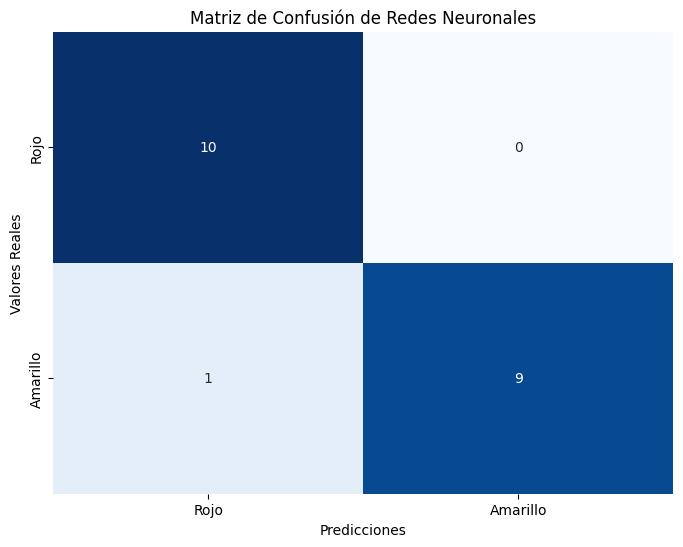

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


from google.colab import drive
drive.mount('/content/drive')
# Cargar tu conjunto de datos
data = pd.read_csv("/content/drive/My Drive/Tesis/Dataset/nuevo_dataset_prueba.csv")

# Separar las características (X) y las etiquetas (y)
X = data[['NIR_R', 'NIR_S', 'NIR_T', 'NIR_U', 'NIR_V', 'NIR_W', 'Vis_Violet', 'Vis_Blue', 'Vis_Green', 'Vis_Yellow', 'Vis_Orange', 'Vis_Red']]
y = data['Clase (R=0,A=1)']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))
# Guardar el modelo
model.save('my_model_Clasificacion.h5')
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
# Hacer predicciones
predictions = model.predict(X_test)
prueba= [-0.03652228, -0.85802933, -0.62747477, -0.67743489, -0.13891407, -0.41888914, -0.4395896,   0.46766757,  0.87206404,  0.73053845,  0.25053946, -0.33990179]
predictions = (predictions > 0.5).astype(int)  # Convertir las predicciones a 0 o 1
# Convertir 'prueba' a un array NumPy
prueba_array = np.array(prueba).reshape(1, -1)  # Redimensionar a un array 2D para la predicción

predic=model.predict(prueba_array) # Pasar el array NumPy a predict
predic= (predic > 0.5).astype(int)
print(predic)


from sklearn.metrics import confusion_matrix

# Hacer predicciones
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convertir las predicciones a 0 o 1

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

import matplotlib.pyplot as plt
import seaborn as sns
# Graficar la matriz de confusión con colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # cmap='Blues' para una paleta azul, cbar=False para ocultar la barra de colores
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión de Redes Neuronales')

# Cambiar las etiquetas de los ejes
tick_labels = ['Rojo', 'Amarillo']
plt.xticks([0.5, 1.5], tick_labels)
plt.yticks([0.5, 1.5], tick_labels)

plt.show()




In [ ]:
# prompt: sacar estas metricas accuracy
# precision
# recall
# f1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ... (código previo)

# Hacer predicciones
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convertir las predicciones a 0 o 1

# Calcular las métricas
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Imprimir las métricas
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Accuracy: 0.95
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316


In [ ]:
import tensorflow as tf

# Supongamos que tu modelo está en una variable llamada 'model'
# Guardar el modelo en formato SavedModel
model.save('my_model_Clasificacion.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model) # Usa from_keras_model en lugar de from_saved_model
tflite_model = converter.convert()

# Guardar el modelo TFLite en un archivo
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Configurar el convertidor para la quantización
converter.optimizations = [tf.lite.Optimize.DEFAULT]
quantized_tflite_model = converter.convert()

# Guardar el modelo quantizado
with open('quantized_model.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# Usar xxd para convertir el modelo TFLite a un archivo de cabecera C
!xxd -i quantized_model.tflite > model.h
! cat model.h


Saved artifact at '/tmp/tmpamoxaxnp'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133370662119456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133370662121920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133370736104320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133370719417120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133370662438160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133370662440976: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmpjq9j51xk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133370662119456: Tenso